# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


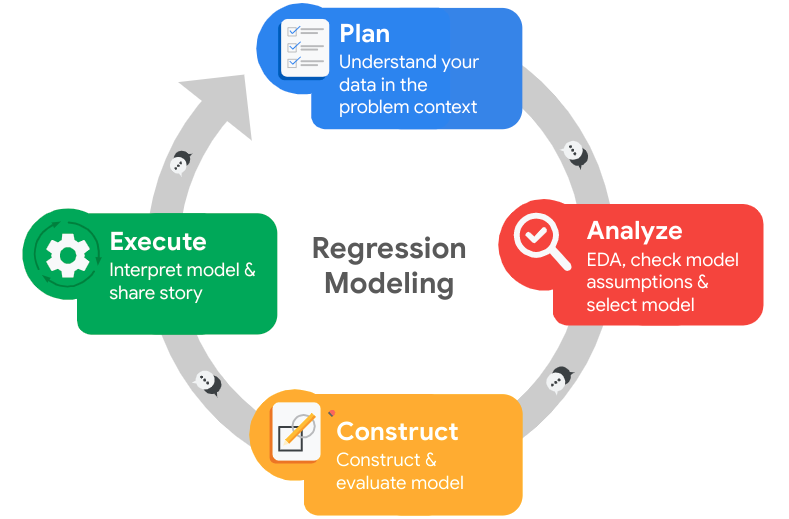

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The stakeholders for this project would be, according to the capstone project introduction, are the members of the leadership team, who want to find out ways to increase employee retention
- The aim of this capstone project is to build a predictive machine learning model that will predict whether an employee will stay or leave the company
- As I explore the data, I am uncovering data types, variable names, as well as potential relationsips between variables. All of these are helping me plan my next moves and how I approach the problem
- I find myself frequently revisiting previous labs and follow-along code blocks to refresh concepts, as well as python API reference/documentation pages to help me with function parameters and syntax
- In terms of ethical considerations, we should refer to the context of the problem: What happens to the company if we make a false prediction? What's the cost? For a false positive, the cost is minimal at worst; we've predicted that an employee will leave, but they end up staying, then we've lost nothing. On the other hand, if we end up with a false negative, we've predicted that an employee will stay, but they end up leaving. In this case, we've accumulated several loses: onboarding/training money/time/resources, now we must repeat the process to find a replacement

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix,\
ConfusionMatrixDisplay, roc_curve, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We notice that there are no null entries in the dataset -- this is good! We also observe two categorical variables that may need to be numerically encoded for use with our classifiers later.

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
column_mapper = {
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department',
    'number_project': 'num_projects'
}

df0 = df0.rename(columns=column_mapper)
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().any(axis=1).sum()

0

This confirms that there are no missing values in the data

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
# let's examine the last few rows of data
df0.tail(5)

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(10)

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


To ensure that this new variable has no duplicates for good, we will double-check again using the same method as above

In [11]:
df.duplicated().sum()

0

Having a sum of 0 indicates that we have no duplicate values

### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Boxplot distribution of tenure variable')

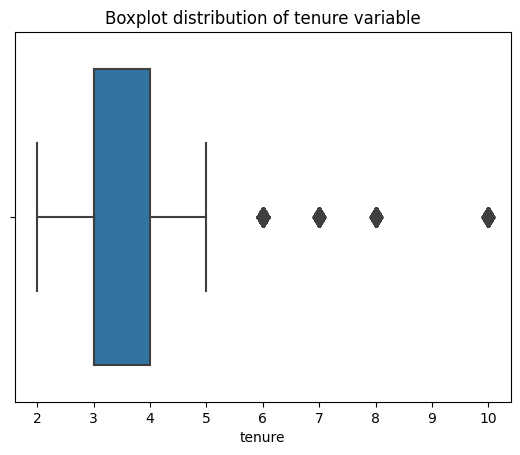

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(data=df, x='tenure', fliersize=10.0)
plt.title('Boxplot distribution of tenure variable')

Since we've set the parameter `showfliers = True` by leaving it default, the graph shows outlier values as large points. It seems that anything above and including 6 years of tenure is considered an outlier for that specific column

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

(df['tenure'] >= 6).sum()

824

According to the above calculation, we have 824 rows with outlier values in the `tenure` column

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

Let's remove the outliers now before we forget since `LogisticRegression` is quite sensitive to outliers

In [14]:
tenure_75 = df['tenure'].quantile(0.75)
tenure_25 = df['tenure'].quantile(0.25)
# defining the quantiles
tenure_iqr = tenure_75 - tenure_25
# IQR is the same as Q3 (75 percentile) - Q1 (25th percentile)
tenure_upper = tenure_75 + (1.5*tenure_iqr)
tenure_lower = tenure_25 - (1.5*tenure_iqr)
print(tenure_upper)
print(tenure_lower)

5.5
1.5


In [15]:
# now remove rows with extreme values
df = df.loc[(df['tenure'] <= tenure_75) & (df['tenure'] >= tenure_25)]

In [16]:
df.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
display(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
display(df['left'].value_counts(normalize=True))

left
0    5826
1    1369
Name: count, dtype: int64

left
0    0.809729
1    0.190271
Name: proportion, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [18]:
# let's take another look at the data
df.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


Based on the above variables, we could investigate the relationships between the following pairs of variables:
- evaluation score as a function of average_monthly_hours -- is there a threshold where performance starts to wane the more employees work/are worked?
- tenure across different departments (how many employees left?)
- satisfaction across different departments (how many employees left?)
- number of work accidents across different departments
- is there a relationship between level of salary (high/medium/low) and satisfaction level? evaluation score?

#### Evaluation score vs average monthly hours

<Axes: xlabel='average_monthly_hours', ylabel='last_evaluation'>

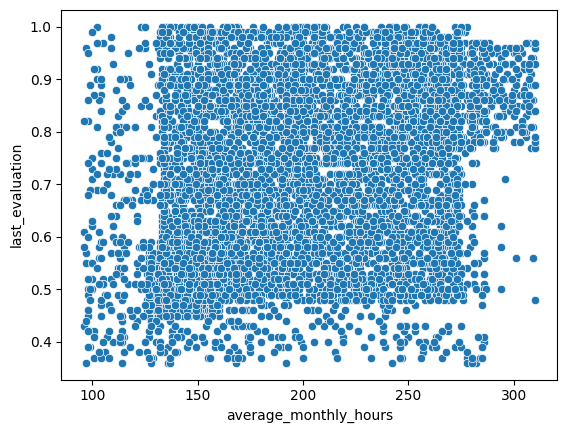

In [19]:
# scatterplot, average monthly hours on x-axis, last evaluation on y-axis
sns.scatterplot(x='average_monthly_hours', y='last_evaluation', data=df)

#### Tenure across different departments

<Axes: xlabel='department', ylabel='tenure'>

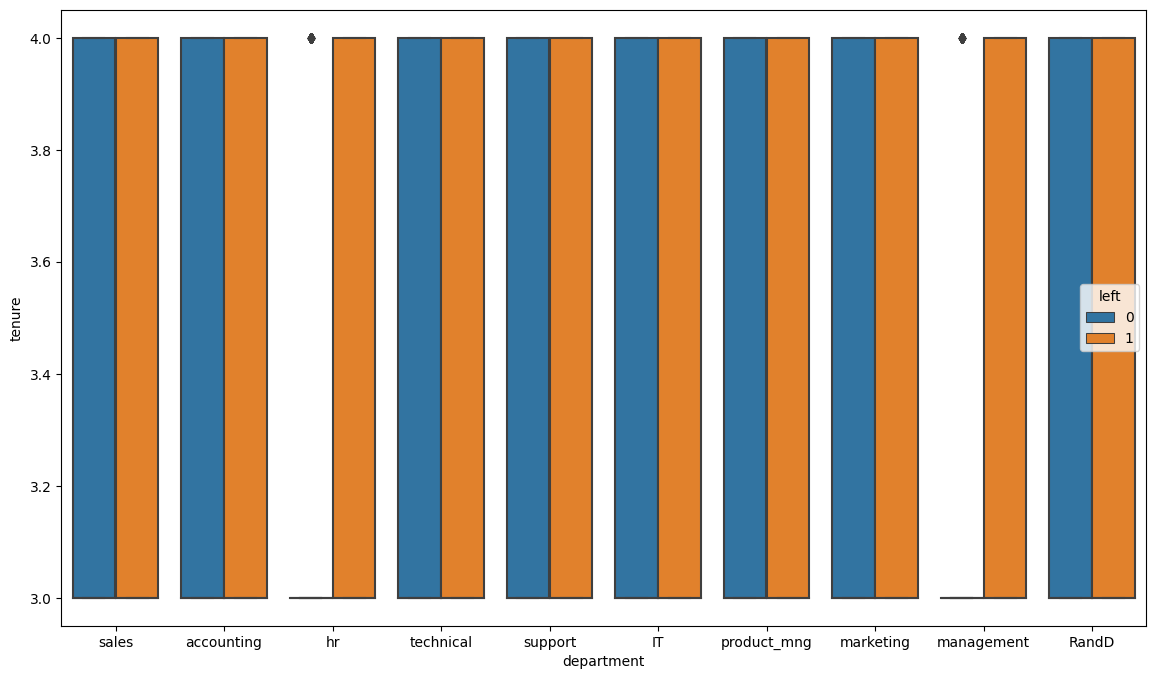

In [20]:
# show a boxplot distribution showing distribution of tenure across different departments
plt.figure(figsize=(14, 8))
sns.boxplot(x='department', y='tenure', hue='left', data=df)

#### Satisfaction across different departments

<Axes: xlabel='department', ylabel='satisfaction_level'>

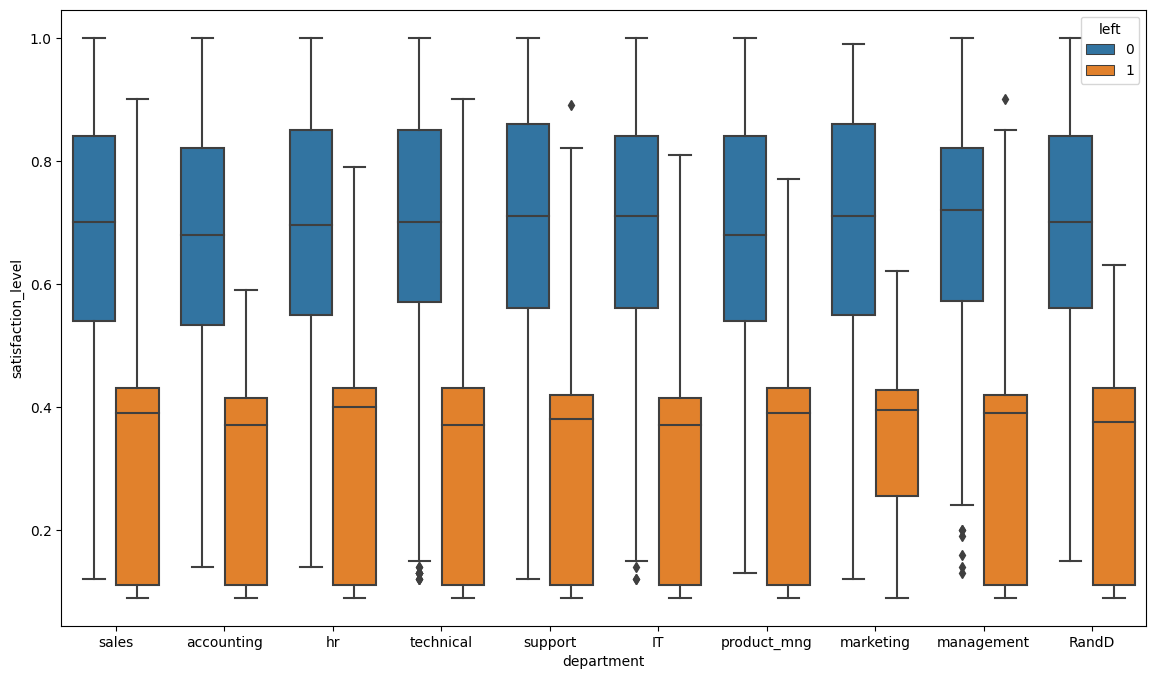

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='department', y='satisfaction_level', hue='left', data=df)

#### Number of work accidents by department

,department,work_accident
0,IT,72
1,RandD,68
2,accounting,60
3,hr,38
4,management,38
5,marketing,67
6,product_mng,64
7,sales,286
8,support,159
9,technical,201


<Axes: title={'center': 'Number of work accidents by department'}, xlabel='department', ylabel='work_accident'>

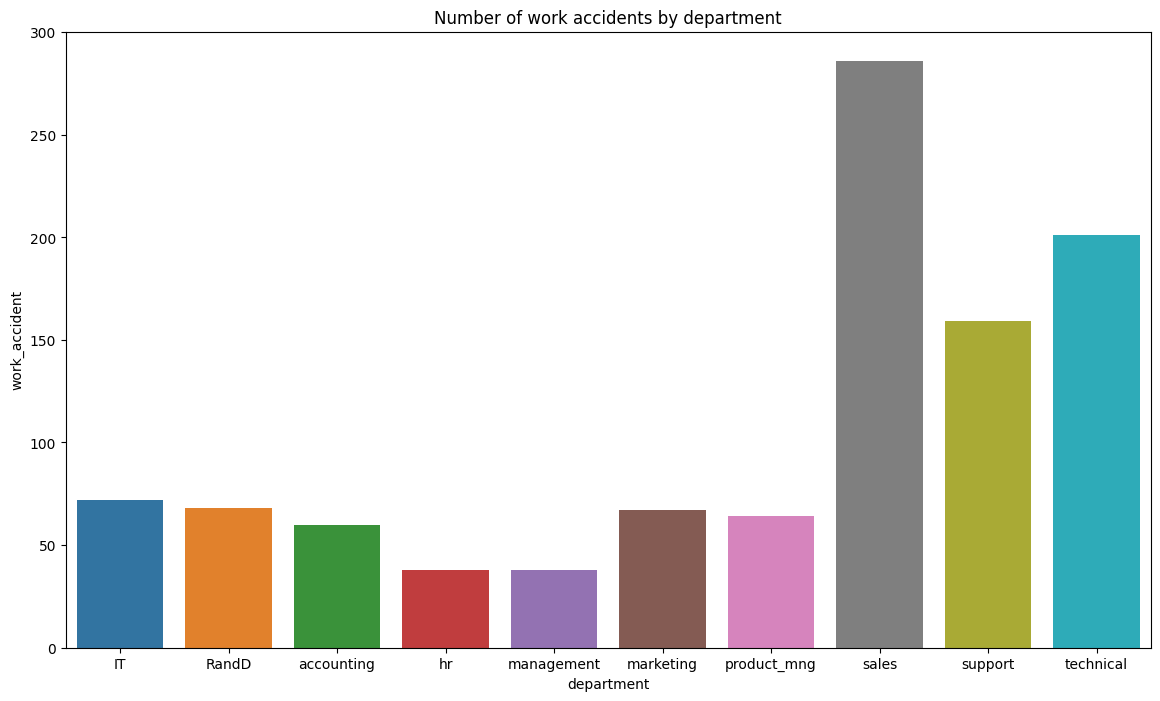

In [22]:
# for this we'll make us of groupby to aggregate by department
work_accidents_by_dep = df.groupby(by=['department'])['work_accident'].sum().reset_index()
display(work_accidents_by_dep)
plt.figure(figsize=(14,8))
plt.title('Number of work accidents by department')
sns.barplot(data=work_accidents_by_dep, x='department', y='work_accident')

#### Satisfaction and evaluation score distributions by salary

<Axes: xlabel='salary', ylabel='last_evaluation'>

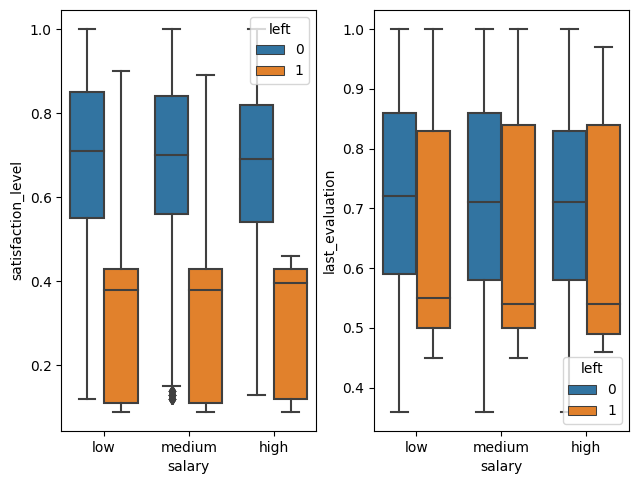

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
sns.boxplot(data=df, x='salary', y='satisfaction_level', hue='left', ax=ax[0])
sns.boxplot(data=df, x='salary', y='last_evaluation', hue='left', ax=ax[1])

### Insights

- There seems to be no correlation between average monthly hours and last evaluation score. In other words, employees aren't likely to burn out and let productivity drop off the more they work during the month
- Tenure across departments seems to be very consistent; no one department is holding onto employees significantly more than the other. It is worth nothing however that within any given department, the median tenure for an employee that left seems to be longer than the median tenure for an employee that stays. This might suggest employees becoming more unhappy the longer they stay (and this is across all departments)
- Satisfaction is department-independent, meaning that employee satisfaction remained equally distributed no matter the department. Some notable observations were that departments such as HR, Marketing, and Product Management had lesser spread than other departments, and that satisfaction was consistently lower for employees that left the company, no matter the department
- Sales has the most number of work accidents of any department by a landslide -- curious as to why this could be the case. We could look into what is defined as sufficient for a "work accident" (in this context, something like a coffee spill would make sense)
- Employee satisfaction and evaluation score are almost identically distributed across all three salary levels -- this is a very good sign. It indicates that the work environment and culture is good to the point where lesser earning employees still feel content, valued, and also perform just as well. Although evidently, employees who leave end up being less satisfied than employees who stay, no matter the salary level

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is binary classification (leave the company or not)

### Identify the types of models most appropriate for this task.

We will use a `LogisticRegression` classifier

### Modeling

Add as many cells as you need to conduct the modeling process.

We'll have to convert the categorical variables to numeric. For `department`, this means a one-hot/dummy encoding; for `salary`, since there is a hierarchy, we should create an ordinal encoding

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7195 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     7195 non-null   float64
 1   last_evaluation        7195 non-null   float64
 2   num_projects           7195 non-null   int64  
 3   average_monthly_hours  7195 non-null   int64  
 4   tenure                 7195 non-null   int64  
 5   work_accident          7195 non-null   int64  
 6   left                   7195 non-null   int64  
 7   promotion_last_5years  7195 non-null   int64  
 8   department             7195 non-null   object 
 9   salary                 7195 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 618.3+ KB


In [25]:
df = pd.get_dummies(df, columns=['department'], drop_first=False, dtype=int)
display(df.head())

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
salary_col_encoded = enc.fit_transform(df[['salary']])
df['salary'] = salary_col_encoded
display(df.head())

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0


We can see from the above two outputs that the different levels of `salary` get different values -- `low` gets a value of `1.0`, `medium` gets a value of `2.0`, and `high` gets a value of `3.0`

Standardizing can be a good way to improve model performance, since it puts variables on the same scale

In [27]:
std_vars = ['satisfaction_level', 'last_evaluation', 'num_projects', 'average_monthly_hours', 'tenure', 'salary']
std = StandardScaler()
standardized = pd.DataFrame(std.fit_transform(df[std_vars]))
display(standardized)

,0,1,2,3,4,5
0,-0.945190,-1.034814,-1.403139,-0.820470,-0.621546,-0.570120
1,-2.045413,1.048556,2.659471,1.503728,1.608891,1.037251
2,-0.985939,-1.094339,-1.403139,-0.780049,-0.621546,-0.570120
3,-0.822943,-1.213389,-1.403139,-0.901312,-0.621546,-0.570120
4,-2.086162,0.393782,1.846949,0.998468,1.608891,-0.570120
...,...,...,...,...,...,...
7190,0.440276,-0.380041,0.221905,-0.113105,-0.621546,1.037251
7191,-0.537700,-1.213389,1.034427,-1.123626,1.608891,1.037251
7192,-1.719421,0.512832,0.221905,0.634680,1.608891,1.037251
7193,0.032786,0.869981,-0.590617,0.796363,-0.621546,1.037251


Rename columns to re-introduce meaning into these standardized values

In [28]:
rename_mapper = {
    i: var for i, var in enumerate(std_vars)
}

In [29]:
standardized_new = standardized.rename(rename_mapper, axis=1)
display(standardized_new)

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,salary
0,-0.945190,-1.034814,-1.403139,-0.820470,-0.621546,-0.570120
1,-2.045413,1.048556,2.659471,1.503728,1.608891,1.037251
2,-0.985939,-1.094339,-1.403139,-0.780049,-0.621546,-0.570120
3,-0.822943,-1.213389,-1.403139,-0.901312,-0.621546,-0.570120
4,-2.086162,0.393782,1.846949,0.998468,1.608891,-0.570120
...,...,...,...,...,...,...
7190,0.440276,-0.380041,0.221905,-0.113105,-0.621546,1.037251
7191,-0.537700,-1.213389,1.034427,-1.123626,1.608891,1.037251
7192,-1.719421,0.512832,0.221905,0.634680,1.608891,1.037251
7193,0.032786,0.869981,-0.590617,0.796363,-0.621546,1.037251


In [30]:
df1 = df.loc[:, ~(df.columns.isin(std_vars))].reset_index()
df1

,index,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,0,1,0,0,0,0,0,0,0,0,1,0,0
2,4,0,1,0,0,0,0,0,0,0,0,1,0,0
3,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,6,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,11985,0,0,0,0,0,0,0,0,0,0,1,0,0
7191,11986,0,0,0,1,0,0,0,0,0,0,0,0,0
7192,11987,0,0,0,0,0,0,0,0,0,1,0,0,0
7193,11992,1,0,0,1,0,0,0,0,0,0,0,0,0


In [31]:
df = df.loc[:, df.columns != 'index']
df

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,2.0,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,2.0,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,2.0,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,2.0,1,0,0,0,0,0,0,0,0,0


Isolate the independent and dependent variables

In [32]:
X = df.loc[:, df.columns != 'left']

In [33]:
y = df['left']

In [34]:
display(X)
display(y)

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,1.0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,0,1.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,2.0,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,2.0,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,2.0,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,2.0,1,0,0,0,0,0,0,0,0,0


0        1
2        1
4        1
5        1
6        1
        ..
11985    0
11986    0
11987    0
11992    0
11999    0
Name: left, Length: 7195, dtype: int64

Next, we can split the data into a training, validation, and testing split (60/20/20)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Let's print the dimensions of each component to ensure our split happened properly

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5396, 18)
(1799, 18)
(5396,)
(1799,)


Everything seems to be in order!

Let's check the proportions of training, validation, and testing to the original dataset:

In [37]:
train_size = X_train.shape[0]
test_size = X_test.shape[0]

In [38]:
print(f'Training ratio: {round((train_size/len(df)*100), 2)}')
print(f'Testing ratio: {round((test_size/len(df)*100), 2)}')

Training ratio: 75.0
Testing ratio: 25.0


Now that our dataset has been split into training and testing, we can now fit the model

In [39]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Our model's done fitting, so we can now extract the best parameters, as well as the best score

#### Put results in a grid

In [40]:
y_pred = lr.predict(X_test)

In [41]:
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc = roc_auc_score(y_test, y_pred)

In [42]:
test_results = {
    'model_name': 'Testing Set',
    'accuracy': test_accuracy,
    'recall': test_recall,
    'precision': test_precision,
    'f1': test_f1,
    'roc': test_roc
}
test_results_df = pd.DataFrame([test_results])
test_results_df

,model_name,accuracy,recall,precision,f1,roc
0,Testing Set,0.91662,0.868421,0.738806,0.798387,0.898178


In order to plot the ROC curve, we need to use the `predict_proba` method to get probabilities for the positive class

In [43]:
class_probs = lr.predict_proba(X_test)
class_probs

array([[0.99715624, 0.00284376],
       [0.92996832, 0.07003168],
       [0.96717622, 0.03282378],
       ...,
       [0.99850967, 0.00149033],
       [0.99538366, 0.00461634],
       [0.99865812, 0.00134188]])

In [44]:
pos_probs = class_probs[:,0]
pos_probs

array([0.99715624, 0.92996832, 0.96717622, ..., 0.99850967, 0.99538366,
       0.99865812])

Now feed these into the `roc_curve` method

Text(0.5, 1.0, 'ROC Curve of Best LogReg model on Testing Set')

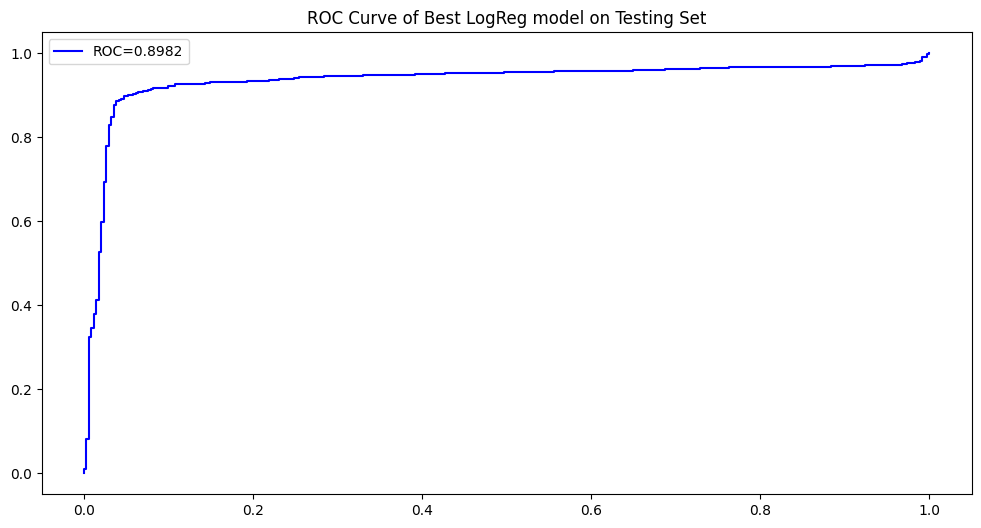

In [45]:
fpr, tpr, _ = roc_curve(y_test, pos_probs)
plt.figure(figsize=(12,6))
plt.plot(tpr, fpr, 'b', label=f'ROC={test_roc:.4f}')
plt.legend(loc='best')
plt.title('ROC Curve of Best LogReg model on Testing Set')

#### Confusion Matrix to see where the model thrives and struggles

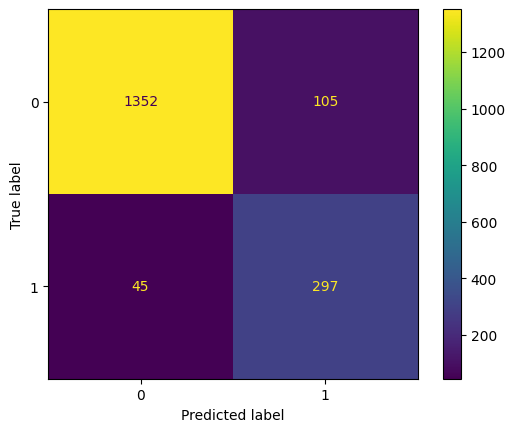

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
cm_disp.plot()

#### Visualizing feature importance/coefficients

In [47]:
var_coefs = [(pair[0], abs(pair[1])) for pair in zip(X.columns, lr.coef_[0])]
var_coefs

[('satisfaction_level', 10.455497828981477),
 ('last_evaluation', 1.3872346438973913),
 ('num_projects', 0.6405730945574005),
 ('average_monthly_hours', 0.0011527845443650743),
 ('tenure', 0.13374292431404325),
 ('work_accident', 1.2320056868332774),
 ('promotion_last_5years', 0.6284766912758059),
 ('salary', 0.005897332100896164),
 ('department_IT', 0.039913436842848087),
 ('department_RandD', 0.5248419685546466),
 ('department_accounting', 0.044689170615012604),
 ('department_hr', 0.3704000162283575),
 ('department_management', 0.29577366241229697),
 ('department_marketing', 0.1459521057996216),
 ('department_product_mng', 0.24374142144154823),
 ('department_sales', 0.03203093021346036),
 ('department_support', 0.004302316943750901),
 ('department_technical', 0.05065022229179006)]

In [48]:
var_coefs = sorted(var_coefs, key=lambda pair: pair[1], reverse=True)
var_coefs

[('satisfaction_level', 10.455497828981477),
 ('last_evaluation', 1.3872346438973913),
 ('work_accident', 1.2320056868332774),
 ('num_projects', 0.6405730945574005),
 ('promotion_last_5years', 0.6284766912758059),
 ('department_RandD', 0.5248419685546466),
 ('department_hr', 0.3704000162283575),
 ('department_management', 0.29577366241229697),
 ('department_product_mng', 0.24374142144154823),
 ('department_marketing', 0.1459521057996216),
 ('tenure', 0.13374292431404325),
 ('department_technical', 0.05065022229179006),
 ('department_accounting', 0.044689170615012604),
 ('department_IT', 0.039913436842848087),
 ('department_sales', 0.03203093021346036),
 ('salary', 0.005897332100896164),
 ('department_support', 0.004302316943750901),
 ('average_monthly_hours', 0.0011527845443650743)]

In [49]:
fts, vals = zip(*var_coefs)
display(fts)
display(vals)

('satisfaction_level',
 'last_evaluation',
 'work_accident',
 'num_projects',
 'promotion_last_5years',
 'department_RandD',
 'department_hr',
 'department_management',
 'department_product_mng',
 'department_marketing',
 'tenure',
 'department_technical',
 'department_accounting',
 'department_IT',
 'department_sales',
 'salary',
 'department_support',
 'average_monthly_hours')

(10.455497828981477,
 1.3872346438973913,
 1.2320056868332774,
 0.6405730945574005,
 0.6284766912758059,
 0.5248419685546466,
 0.3704000162283575,
 0.29577366241229697,
 0.24374142144154823,
 0.1459521057996216,
 0.13374292431404325,
 0.05065022229179006,
 0.044689170615012604,
 0.039913436842848087,
 0.03203093021346036,
 0.005897332100896164,
 0.004302316943750901,
 0.0011527845443650743)

Text(0, 0.5, 'Feature')

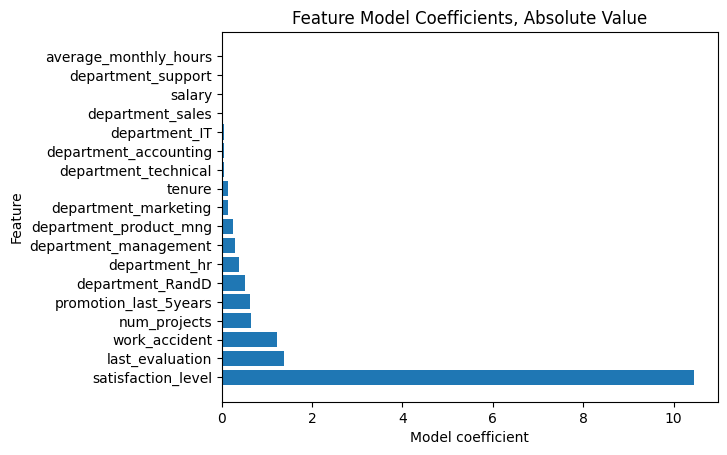

In [50]:
plt.barh(y=fts, width=vals)
plt.title('Feature Model Coefficients, Absolute Value')
plt.xlabel('Model coefficient')
plt.ylabel('Feature')

Finally, verify the model assumptions
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

#### Assumption 1: Outcome variable is categorical

This is met, since our response variable `left` is categorical -- either a customer leaves, or doesn't leave (it is however, encoded numerically)

#### Assumption 2: Observations are independent of each other

This assumption is met, since all data points (rows) are unique

#### Assumption 3: No severe multicollinearity

We can check for this using a correlation matrix

<Axes: >

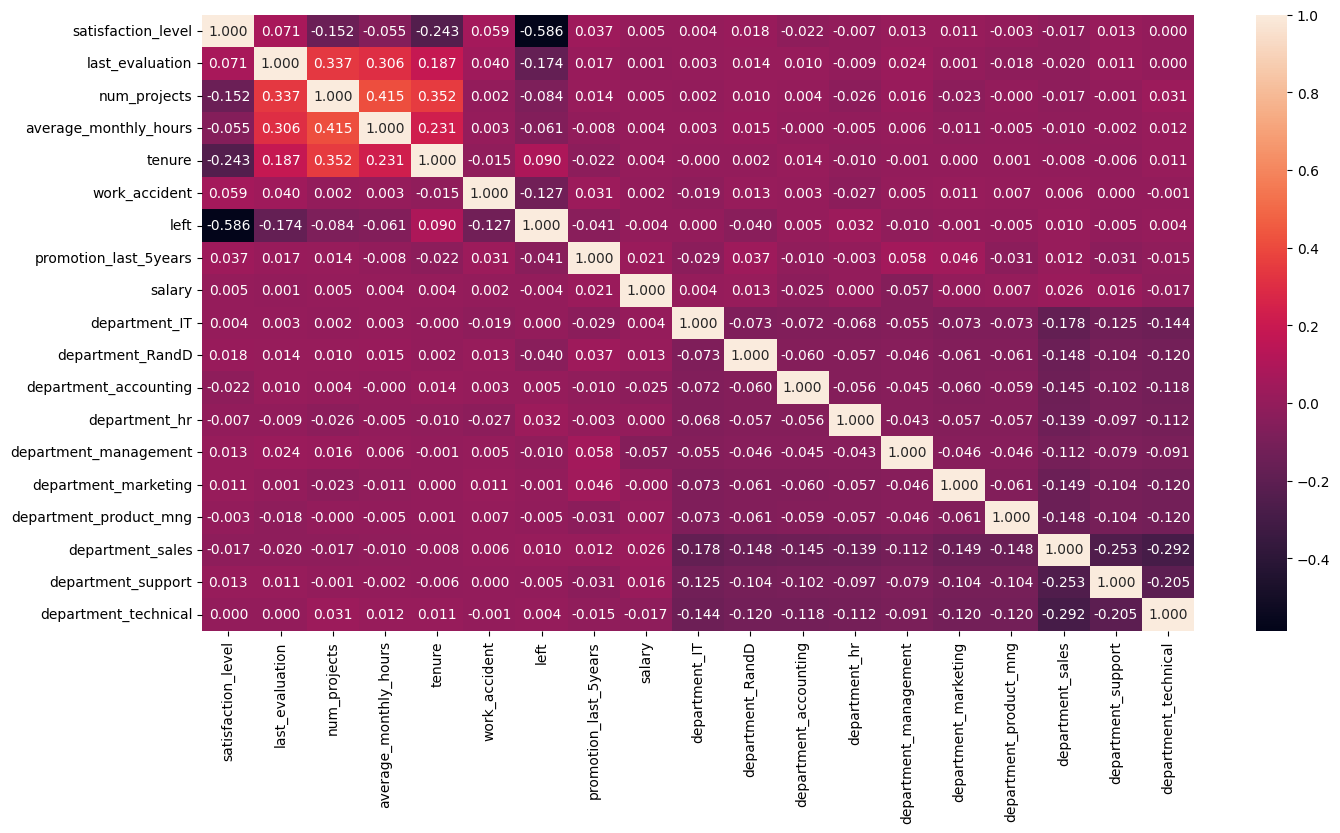

In [51]:
ft_corr = df.corr(method='pearson')
plt.figure(figsize=(16,8))
# generate heatmap
sns.heatmap(ft_corr, annot=True, fmt='.3f')

From the above heatmap, we can see that no two *independent* variables are highly correlated to each other, which validates the assumption

#### Assumption 4: No extreme outliers

The outliers in the `tenure` column were eliminated in an earlier step, however we must be careful with this step; if our dataset is not sufficiently large enough, eliminating outliers from every column could result in us excluding a large fraction of the dataset, leaving us with little data to train/test than we would have liked

#### Assumption 5: Linear relationship between each X variable and logit of dependent variable

Here we'll create a new column for the logit of `left`, then create a pairplot with all the other independent variables to check for said linear relationship. To do this, we will get the log odds for each sample in the dataset

In [52]:
from scipy.special import logit
pos_probs_df = lr.predict_proba(X_train)[:,1]
X_train['logit left'] = logit(pos_probs_df)
X_train['logit left']

6390    -6.345141
71       1.411128
11004   -5.518801
3718    -5.104293
9316    -3.823107
           ...   
35       0.606103
8170    -6.879266
7625     0.459608
2756    -4.571941
883      0.923364
Name: logit left, Length: 5396, dtype: float64

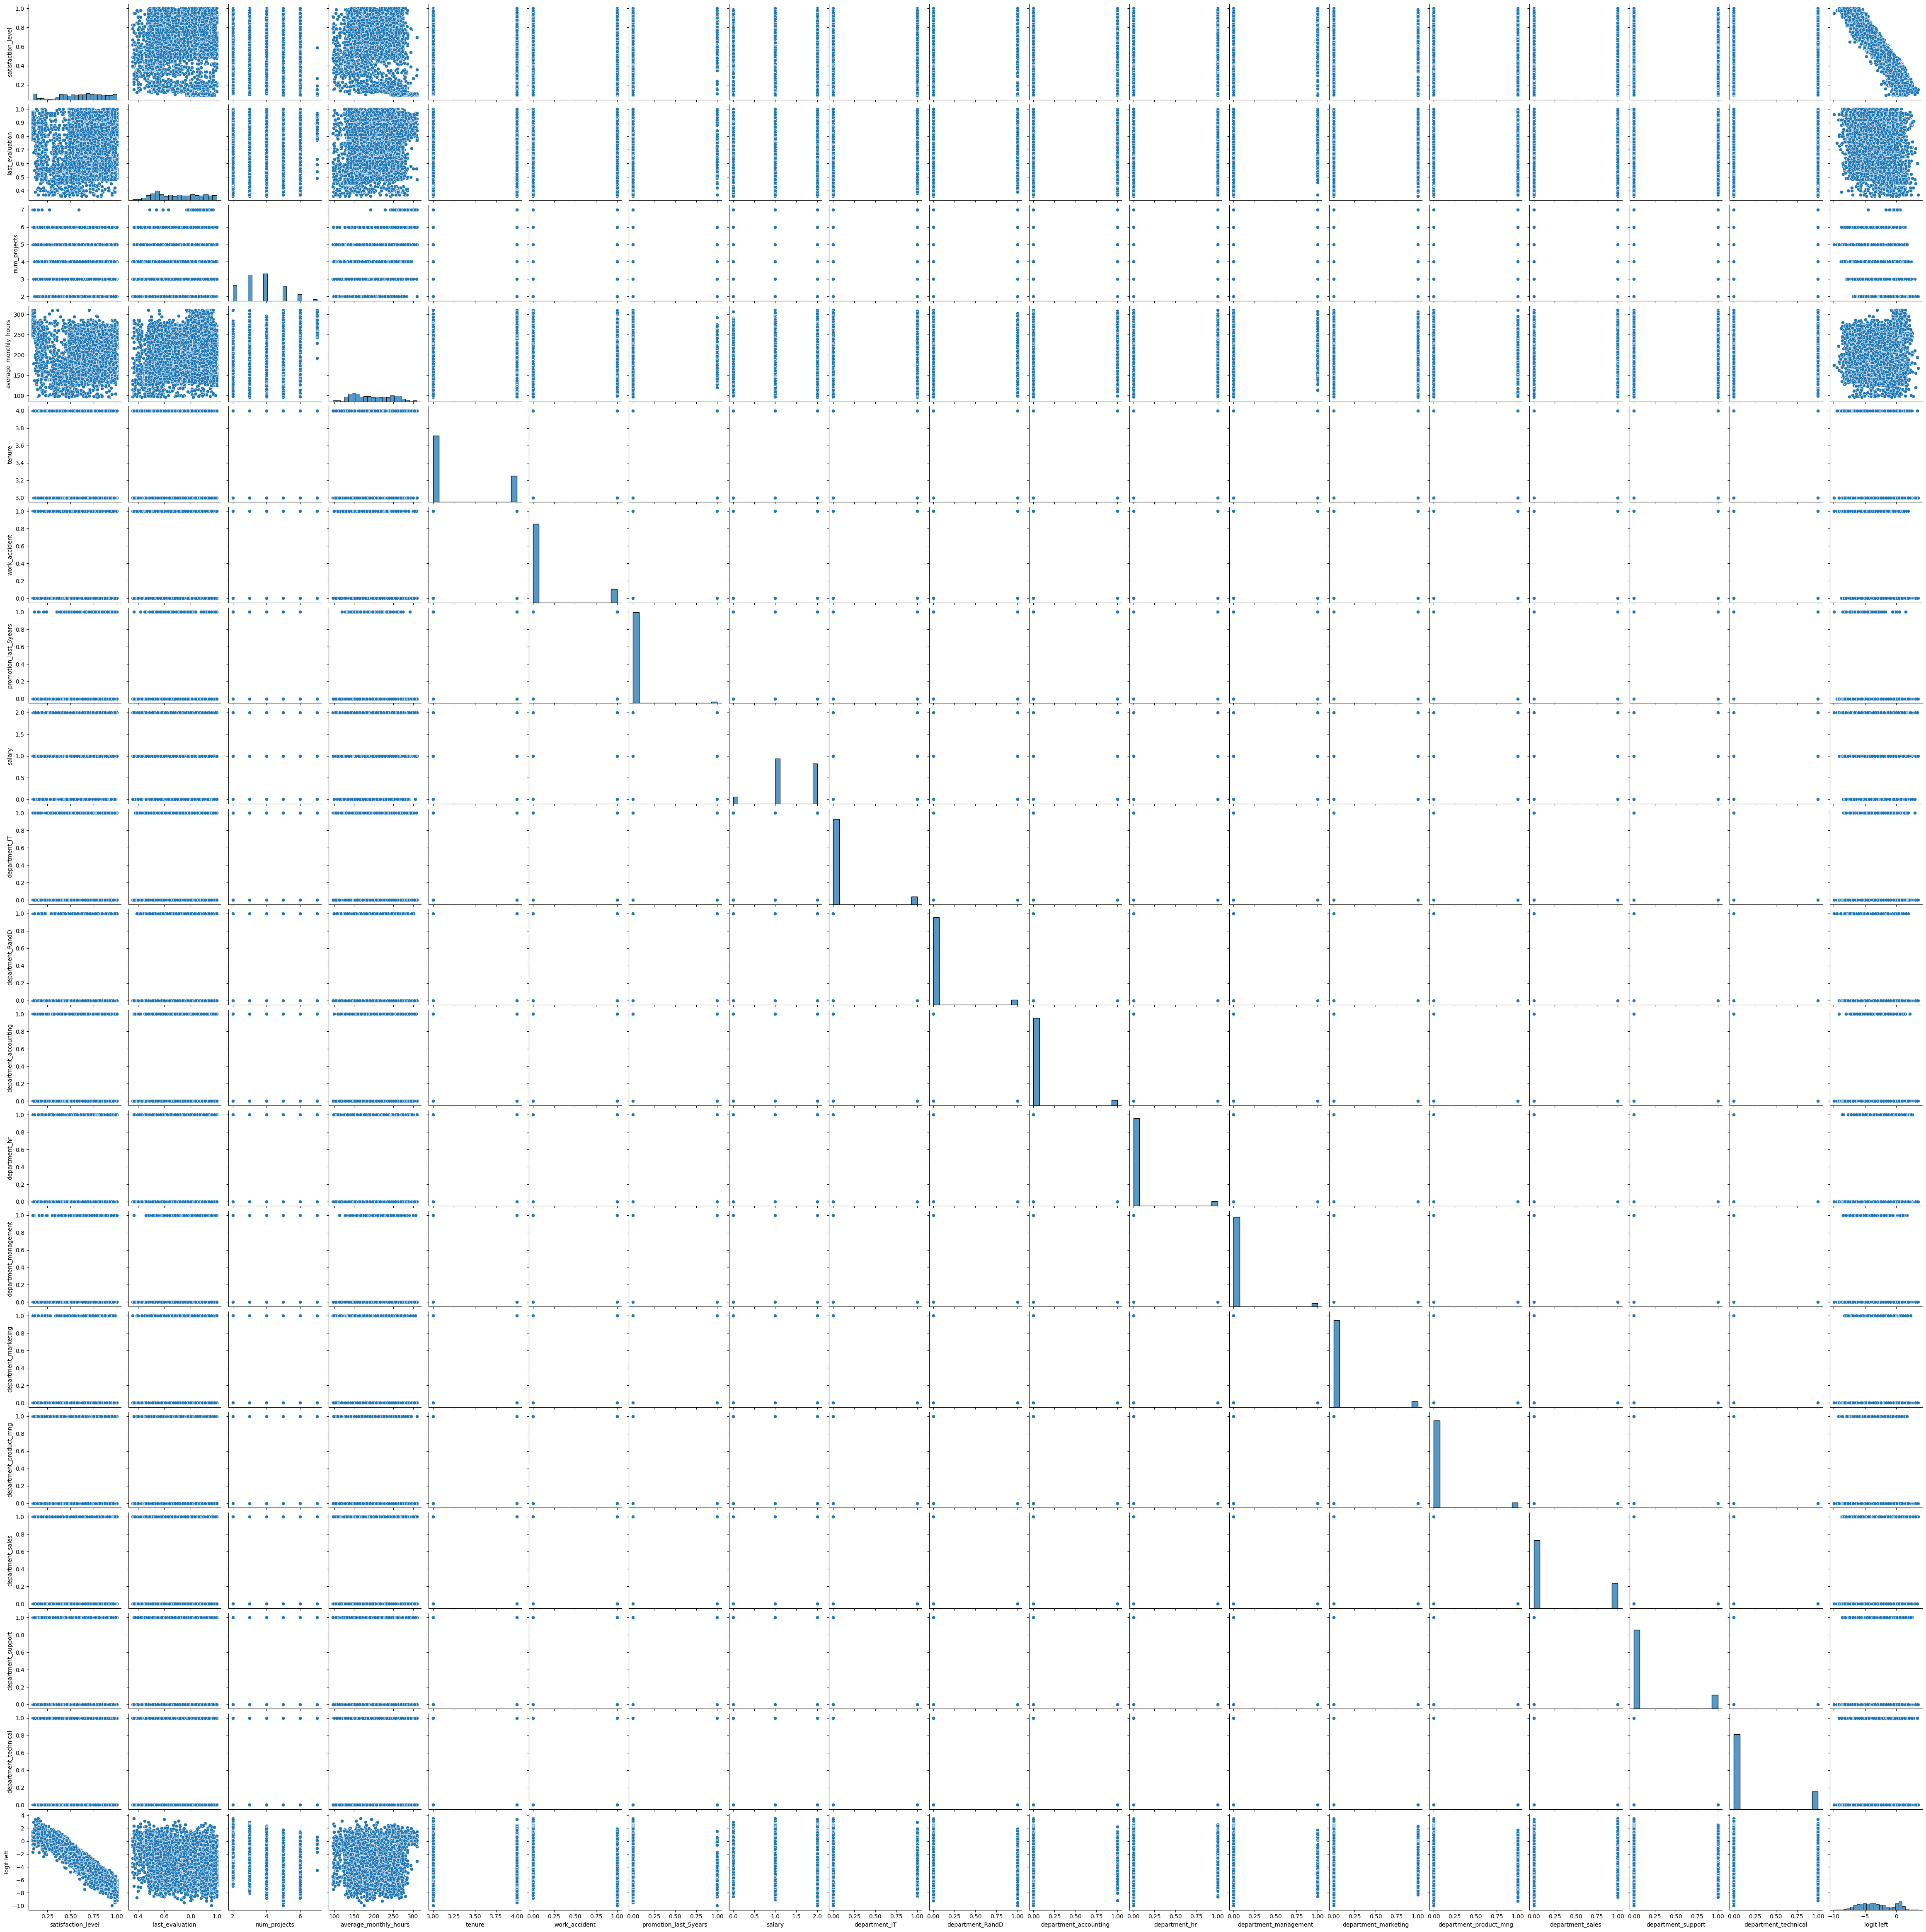

In [53]:
sns.pairplot(X_train)

It does seem that this rule is violated, as not many of the columns seem to share a linear relationship with the logit of `left`

#### Assumption 6: Large enough sample size

Our sample size is 15000, approximately 10000 after removing duplicates and outliers. This is a sufficient, albeit perhaps not ideal, amount of samples to adequately train a predictive model

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

We can see from the model results above that the model performed extremely well across all performance metrics, from accuracy, all the way to ROC:
- An accuracy score of 0.91662 means that 91.6% of samples were classified correctly across the testing set. This is very good, as it indicates that we have made very few errors overall
- A recall score of 0.868421 means that 86.8% of positive predictions turned out to be predicted correctly -- true positives. This is also very good, since it indicates that the model seldom incorrectly predicted a positive sample as a false postive
- A precision score of 0.73886	means that 73.9% of positive samples were correctly classified. This is an OK result, but not ideal. It shows that the model has some difficulty in differentiating false negatives from true positives. In other words, some data points were incorrectly labelled as employees that would stay, but ended up leaving, therefore costing the company in onboarding/training money, time, and resources
- An F1 score of 0.79837 reflects the relatively low precision score compared to the recall score. This is shown due to the fact that F1 score is the harmonic mean of precision and recall, and so if one metric suffers, F1 does too
- An AUROC score of 0.898178 indicates that our model can correctly distinguish between the positive and negative classes 89.8% of the time, which is a very strong score

### Conclusion, Recommendations, Next Steps

**Conclusion:**
- This capstone project provided a holistic review of the certificate course, blending aspects from different sections and fusing them together into one notebook that had us doing data cleaning/feature engineering, data analysis, as well as implementing a predictive machine learning model

**Recommendations:**
- The model's performance is good enough to be considered for deployment use, perhaps after some modifications
- We see from the feature importance section that the most important features include the likes of `satisfaction_level`, `last_evaluation`, `work_accident`, and `num_projects`. As a follow up, we could investigate further into these factors; what did the last evaluation of churned/retained employees look like? How severe were the work accidents? Were the projects unreasonably demanding, and did that contribute to low satisfaction scores?

**Next steps for improvement:**
- A potential next step would be to gather more data from the employees, to provide for a more robust and comprehensive dataset that, when used for training, can generalize well to new, unseen test data
- If we were to do another run of this project, we would make it a goal to improve the precision metric, especially since subpar performance in this regard negatively affects the company as outlined before
- We might ask the department in charge of conducting the survey to perhaps include more features. This might help make data points more distinct from each other and therefore help the model in training on more unseen patterns than it is currently. This, along with our proposal to include more data points, could go hand in hand in helping the model learn the intricate patterns of the employee data without overfitting

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.